In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython.display import display, Image
import pickle

In [2]:
path = 'results/muti_LE_LED_cifer10/'

## load data

In [3]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.cifar10.load_data()

In [4]:
print(len(X_train))
print(len(X_test))
print(X_train.shape)

50000
10000
(50000, 32, 32, 3)


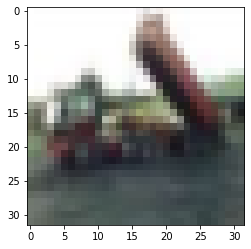

In [5]:
imgplot = plt.imshow(X_train[2])
plt.show()

## preprocessing/F.E.

## set parameter

In [6]:
n_model = 20
n_bs = n_model
epochs = 50
batch_size = 64

# imageshuffle

In [7]:
train_data = pd.DataFrame({'x':[*X_train],'y':[*Y_train]})
test_data = pd.DataFrame({'x':[*X_test],'y':[*Y_test]})
data = [train_data,test_data]

In [8]:
from moudule.BlockScramble import BlockScramble

In [9]:
for d in data:
    d['nor_x'] = d['x'].apply(lambda x:x/255)
    d['cate_y']=[*tf.keras.utils.to_categorical(d['y'])]

In [10]:
bs=[]
for i in range(n_bs):
    bs.append(BlockScramble([4, 4, 3]))
    bs[i].save(path+'key/key'+str(i)+'.pkl')
for d in data:
    for i in range(n_bs):
        d['bs'+str(i)+'_x'] = [*bs[i].Scramble(np.array(list(d['nor_x'])))]

In [11]:
data[0]

,x,y,nor_x,cate_y,bs0_x,bs1_x,bs2_x,bs3_x,bs4_x,bs5_x,...,bs10_x,bs11_x,bs12_x,bs13_x,bs14_x,bs15_x,bs16_x,bs17_x,bs18_x,bs19_x
0,"[[[59, 62, 63], [43, 46, 45], [50, 48, 43], [6...",[6],"[[[0.23137254901960785, 0.24313725490196078, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[[[0.5568628, 0.8862745, 0.78039217], [0.68235...","[[[0.76862746, 0.9647059, 0.8784314], [0.95294...","[[[0.60784316, 0.23529412, 0.12156863], [0.0, ...","[[[0.2509804, 0.2627451, 0.007843138], [0.0666...","[[[0.2, 0.99607843, 0.1254902], [0.90588236, 0...","[[[0.05882353, 0.69411767, 0.9019608], [0.1215...",...,"[[[0.12156863, 0.19215687, 0.94509804], [0.8, ...","[[[0.93333334, 0.94509804, 0.85490197], [0.921...","[[[0.8039216, 0.95686275, 0.7764706], [0.31764...","[[[0.99215686, 0.80784315, 0.5137255], [0.2039...","[[[0.24313726, 1.0, 0.9882353], [0.8901961, 0....","[[[0.02745098, 0.23137255, 0.6509804], [0.5137...","[[[0.6784314, 0.7019608, 0.2627451], [0.560784...","[[[0.5019608, 0.72156864, 0.007843138], [0.615...","[[[0.23137255, 0.7019608, 0.9019608], [0.26666...","[[[0.12156863, 0.44313726, 0.7921569], [0.1215..."
1,"[[[154, 177, 187], [126, 137, 136], [105, 104,...",[9],"[[[0.6039215686274509, 0.6941176470588235, 0.7...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[[0.02745098, 0.5372549, 0.6039216], [0.21568...","[[[0.42352942, 0.7372549, 0.5882353], [0.90980...","[[[0.4509804, 0.4117647, 0.54509807], [0.10588...","[[[0.41568628, 0.9019608, 0.09803922], [0.5450...","[[[0.7176471, 0.40392157, 0.84705883], [0.4823...","[[[0.6039216, 0.90588236, 0.27450982], [0.5176...",...,"[[[0.5882353, 0.47058824, 0.5254902], [0.40392...","[[[0.4862745, 0.34509805, 0.54509807], [0.5058...","[[[0.7176471, 0.39607844, 0.47058824], [0.7921...","[[[0.7137255, 0.27058825, 0.03529412], [0.7137...","[[[0.46666667, 0.47058824, 0.6509804], [0.4627...","[[[0.60784316, 0.4745098, 0.5372549], [0.35686...","[[[0.40392157, 0.08627451, 0.10980392], [0.713...","[[[0.02745098, 0.105882354, 0.65882355], [0.65...","[[[0.38039216, 0.22352941, 0.53333336], [0.411...","[[[0.5254902, 0.972549, 0.3882353], [0.5254902..."
2,"[[[255, 255, 255], [253, 253, 253], [253, 253,...",[9],"[[[1.0, 1.0, 1.0], [0.9921568627450981, 0.9921...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[[0.0627451, 0.050980393, 0.05882353], [0.815...","[[[0.003921569, 0.9411765, 0.8745098], [0.0588...","[[[0.05490196, 0.9411765, 1.0], [0.99607843, 1...","[[[0.8156863, 1.0, 0.99215686], [1.0, 0.0, 0.9...","[[[1.0, 0.0, 0.99215686], [0.0, 1.0, 0.0588235...","[[[0.94509804, 0.8745098, 0.0], [0.94509804, 1...",...,"[[[0.9411765, 1.0, 0.007843138], [0.0, 0.18431...","[[[0.003921569, 0.05882353, 0.8156863], [0.0, ...","[[[0.9411765, 0.0, 0.05882353], [0.18431373, 0...","[[[0.94509804, 0.0, 0.12156863], [1.0, 0.0, 1....","[[[0.9411765, 0.0, 0.0627451], [0.05882353, 1....","[[[0.9411765, 0.9411765, 0.05882353], [0.05882...","[[[0.0, 1.0, 0.18431373], [0.9411765, 0.058823...","[[[0.12156863, 0.05882353, 1.0], [0.1254902, 0...","[[[1.0, 0.9372549, 0.05882353], [0.8745098, 0....","[[[0.9411765, 0.12156863, 0.050980393], [0.941..."
3,"[[[28, 25, 10], [37, 34, 19], [38, 35, 20], [4...",[4],"[[[0.10980392156862745, 0.09803921568627451, 0...","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","[[[0.5529412, 0.7764706, 0.83137256], [0.47450...","[[[0.8666667, 0.6313726, 0.17254902], [0.82745...","[[[0.7607843, 0.1764706, 0.16470589], [0.15686...","[[[0.64705884, 0.44705883, 0.14901961], [0.172...","[[[0.078431375, 0.92941177, 0.011764706], [0.6...","[[[0.18039216, 0.3254902, 0.20784314], [0.1529...",...,"[[[0.12156863, 0.19607843, 0.92941177], [0.925...","[[[0.8392157, 0.07058824, 0.1882353], [0.84705...","[[[0.49411765, 0.827451, 0.7647059], [0.505882...","[[[0.6509804, 0.99607843, 0.5058824], [0.07058...","[[[0.1764706, 0.93333334, 0.93333334], [0.5725...","[[[0.1764706, 0.1764706, 0.68235296], [0.69411...","[[[0.8627451, 0.07058824, 0.654902], [0.050980...","[[[0.5019608, 0.5019608, 0.88235295

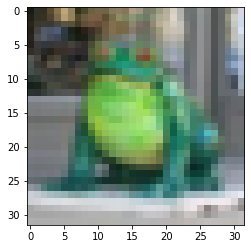

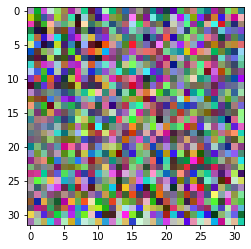

In [12]:
plt.imshow(data[0]['x'][i])
plt.show()
plt.imshow(data[0]['bs0_x'][i])
plt.show()

## Training

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, Input,\
                                    Lambda,MaxPooling2D, GlobalAveragePooling2D,\
                                    Add, Concatenate,BatchNormalization
from tensorflow.keras.models import Model

from moudule.padding import PaddingReplicate2D
from moudule.pixelshuffle import PixelShuffle
from moudule.pixelshuffle import PixelShuffle_calc, PixelShuffle_shape

from keras.metrics import categorical_accuracy
from tensorflow.keras.callbacks import CSVLogger

In [14]:
def resnet1(input_shape, nb_classes=10):
    p1 = PaddingReplicate2D((1,1))
    inp = Input(shape=input_shape)
    x = inp

    # block0 ####################################################
    x = BatchNormalization() (x)
    x = Conv2D( 4*4*3, (4,4), padding='valid', strides=(4,4), kernel_initializer='he_normal' ) (x)
    x = Activation('relu') (x)
    # 8x8x48
    
    x = BatchNormalization() (x)
    x = Conv2D( 4*4*3, (1,1), padding='valid', kernel_initializer='he_normal' ) (x)
    x = Activation('relu') (x)
    # 8x8x48

    x = BatchNormalization() (x)
    x = Conv2D( 4*4*3, (1,1), padding='valid', kernel_initializer='he_normal' ) (x)
    x = Activation('relu') (x)
    # 8x8x48

    x = BatchNormalization() (x)
    x = Conv2D( 4*4*32, (1,1), padding='valid', kernel_initializer='he_normal' ) (x)
    x = PixelShuffle( x, 4 )
    # 32x32x32
    
    # block1 ####################################################
    f = 32
    fs = 16
    for i in range(2):
        f0 = f
        f = f+fs
        r = x[:]
        r = BatchNormalization() (r)
        r = Activation('relu') (r)
        r = Conv2D( f, (3,3), padding='valid', kernel_initializer='he_normal' ) (p1(r))

        r = BatchNormalization() (r)
        r = Activation('relu') (r)
        r = Conv2D( f, (3,3), padding='valid', kernel_initializer='he_normal' ) (p1(r))
        
        r = Dropout(0.25) (r)
        # r0 = Lambda(lambda x: x[:,:,:,:f0], lambda s: (s[0], s[1], s[2], f0)) (r)
        # r1 = Lambda(lambda x: x[:,:,:,f0:], lambda s: (s[0], s[1], s[2], fs) ) (r)
        r0 = r[:,:,:,:f0]
        r1 = r[:,:,:,f0:]

        x = Add() ([x,r0])
        x = Concatenate(axis=-1) ([x,r1])
    # 32x32x64
    
    x = MaxPooling2D(pool_size=(2, 2)) (x)
    # 16x16x64
    # block2 ####################################################
    f = 64
    fs = 32
    for i in range(2):
        f0 = f
        f = f+fs
        r = x

        r = BatchNormalization() (r)
        r = Activation('relu') (r)
        r = Conv2D( f, (3,3), padding='valid', kernel_initializer='he_normal' ) (p1(r))

        r = BatchNormalization() (r)
        r = Activation('relu') (r)
        r = Conv2D( f, (3,3), padding='valid', kernel_initializer='he_normal' ) (p1(r))

        r = Dropout(0.25) (r)

        # r0 = Lambda(lambda x: x[:,:,:,:f0], lambda s: (s[0], s[1], s[2], f0) ) (r)
        # r1 = Lambda(lambda x: x[:,:,:,f0:], lambda s: (s[0], s[1], s[2], fs) ) (r)

        r0 = r[:,:,:,:f0]
        r1 = r[:,:,:,f0:]
        x = Add() ( [x,r0] )
        x = Concatenate(axis=-1) ([x,r1])

        f0 = f
    # 16x16x128

    x = MaxPooling2D(pool_size=(2, 2)) (x)
    # 8x8x128

    # block3 ####################################################
    f = 128
    fs = 64
    for i in range(2):
        f0 = f
        f = f+fs
        r = x

        r = BatchNormalization() (r)
        r = Activation('relu') (r)
        r = Conv2D( f, (3,3), padding='valid', kernel_initializer='he_normal' ) (p1(r))

        r = BatchNormalization() (r)
        r = Activation('relu') (r)
        r = Conv2D( f, (3,3), padding='valid', kernel_initializer='he_normal' ) (p1(r))

        r = Dropout(0.25) (r)

        # r0 = Lambda(lambda x: x[:,:,:,:f0], lambda s: (s[0], s[1], s[2], f0) ) (r)
        # r1 = Lambda(lambda x: x[:,:,:,f0:], lambda s: (s[0], s[1], s[2], fs) ) (r)

        r0 = r[:,:,:,:f0]
        r1 = r[:,:,:,f0:]
        x = Add() ( [x,r0] )
        x = Concatenate(axis=-1) ([x,r1])

        f0 = f
    # 8x8x256

    x = MaxPooling2D(pool_size=(2, 2)) (x)
    # 4x4x256

    # block4 ####################################################
    x = Dropout(0.5) (x)
    x = Conv2D( 512, (1,1), padding='valid', kernel_initializer='he_normal', activation='relu' ) (x)

    x = Dropout(0.5) (x)
    x = Conv2D( nb_classes, (1,1), padding='valid', kernel_initializer='he_normal' ) (x)
    x = GlobalAveragePooling2D() (x)
    x = Activation('softmax') (x)

    return Model(inputs=inp, outputs=x)

In [15]:
model =[]
for i in  range(n_model):
    model.append(resnet1(input_shape=[32,32,3], nb_classes=10))
    model[i].compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model[i].summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 batch_normalization (BatchNorm  (None, 32, 32, 3)   12          ['input_1[0][0]']                
 alization)                                                                                       
                                                                                                  
 conv2d (Conv2D)                (None, 8, 8, 48)     2352        ['batch_normalization[0][0]']    
                                                                                                  
 activation (Activation)        (None, 8, 8, 48)     0           ['conv2d[0][0]']             

 rmalization)                                                    ]']                              
                                                                                                  
 activation_5 (Activation)      (None, 32, 32, 48)   0           ['batch_normalization_6[0][0]']  
                                                                                                  
 conv2d_6 (Conv2D)              (None, 32, 32, 64)   27712       ['padding_replicate2d[2][0]']    
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 32, 32, 64)  256         ['conv2d_6[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 activation_6 (Activation)      (None, 32, 32, 64)   0           ['batch_normalization_7[0][0]']  
          

                                                                                                  
 tf.__operators__.getitem_9 (Sl  (None, 16, 16, 32)  0           ['dropout_3[0][0]']              
 icingOpLambda)                                                                                   
                                                                                                  
 concatenate_3 (Concatenate)    (None, 16, 16, 128)  0           ['add_3[0][0]',                  
                                                                  'tf.__operators__.getitem_9[0][0
                                                                 ]']                              
                                                                                                  
 max_pooling2d_1 (MaxPooling2D)  (None, 8, 8, 128)   0           ['concatenate_3[0][0]']          
                                                                                                  
 batch_nor

 activation_15 (Activation)     (None, 10)           0           ['global_average_pooling2d[0][0]'
                                                                 ]                                
                                                                                                  
Total params: 2,256,902
Trainable params: 2,253,920
Non-trainable params: 2,982
__________________________________________________________________________________________________
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 batch_normalization_16 (BatchN  (None, 32, 32, 3)   12          ['input_2[0][0]']                
 ormalizatio

                                                                 0]']                             
                                                                                                  
 tf.__operators__.getitem_17 (S  (None, 32, 32, 48)  0           ['concatenate_6[0][0]']          
 licingOpLambda)                                                                                  
                                                                                                  
 batch_normalization_22 (BatchN  (None, 32, 32, 48)  192         ['tf.__operators__.getitem_17[0][
 ormalization)                                                   0]']                             
                                                                                                  
 activation_21 (Activation)     (None, 32, 32, 48)   0           ['batch_normalization_22[0][0]'] 
                                                                                                  
 conv2d_24

 tf.__operators__.getitem_22 (S  (None, 16, 16, 96)  0           ['dropout_11[0][0]']             
 licingOpLambda)                                                                                  
                                                                                                  
 add_9 (Add)                    (None, 16, 16, 96)   0           ['concatenate_8[0][0]',          
                                                                  'tf.__operators__.getitem_22[0][
                                                                 0]']                             
                                                                                                  
 tf.__operators__.getitem_23 (S  (None, 16, 16, 32)  0           ['dropout_11[0][0]']             
 licingOpLambda)                                                                                  
                                                                                                  
 concatena

                                                                                                  
 conv2d_35 (Conv2D)             (None, 4, 4, 10)     5130        ['dropout_15[0][0]']             
                                                                                                  
 global_average_pooling2d_1 (Gl  (None, 10)          0           ['conv2d_35[0][0]']              
 obalAveragePooling2D)                                                                            
                                                                                                  
 activation_31 (Activation)     (None, 10)           0           ['global_average_pooling2d_1[0][0
                                                                 ]']                              
                                                                                                  
Total params: 2,256,902
Trainable params: 2,253,920
Non-trainable params: 2,982
_____________________________

                                                                                                  
 tf.__operators__.getitem_30 (S  (None, 32, 32, 16)  0           ['dropout_16[0][0]']             
 licingOpLambda)                                                                                  
                                                                                                  
 concatenate_12 (Concatenate)   (None, 32, 32, 48)   0           ['add_12[0][0]',                 
                                                                  'tf.__operators__.getitem_30[0][
                                                                 0]']                             
                                                                                                  
 tf.__operators__.getitem_31 (S  (None, 32, 32, 48)  0           ['concatenate_12[0][0]']         
 licingOpLambda)                                                                                  
          

 activation_42 (Activation)     (None, 16, 16, 128)  0           ['batch_normalization_43[0][0]'] 
                                                                                                  
 conv2d_47 (Conv2D)             (None, 16, 16, 128)  147584      ['padding_replicate2d_2[7][0]']  
                                                                                                  
 dropout_19 (Dropout)           (None, 16, 16, 128)  0           ['conv2d_47[0][0]']              
                                                                                                  
 tf.__operators__.getitem_36 (S  (None, 16, 16, 96)  0           ['dropout_19[0][0]']             
 licingOpLambda)                                                                                  
                                                                                                  
 add_15 (Add)                   (None, 16, 16, 96)   0           ['concatenate_14[0][0]',         
          

                                                                                                  
 dropout_22 (Dropout)           (None, 4, 4, 256)    0           ['max_pooling2d_8[0][0]']        
                                                                                                  
 conv2d_52 (Conv2D)             (None, 4, 4, 512)    131584      ['dropout_22[0][0]']             
                                                                                                  
 dropout_23 (Dropout)           (None, 4, 4, 512)    0           ['conv2d_52[0][0]']              
                                                                                                  
 conv2d_53 (Conv2D)             (None, 4, 4, 10)     5130        ['dropout_23[0][0]']             
                                                                                                  
 global_average_pooling2d_2 (Gl  (None, 10)          0           ['conv2d_53[0][0]']              
 obalAvera

 tf.__operators__.getitem_43 (S  (None, 32, 32, 32)  0           ['dropout_24[0][0]']             
 licingOpLambda)                                                                                  
                                                                                                  
 add_18 (Add)                   (None, 32, 32, 32)   0           ['lambda_3[0][0]',               
                                                                  'tf.__operators__.getitem_43[0][
                                                                 0]']                             
                                                                                                  
 tf.__operators__.getitem_44 (S  (None, 32, 32, 16)  0           ['dropout_24[0][0]']             
 licingOpLambda)                                                                                  
                                                                                                  
 concatena

                                                                                                  
 conv2d_64 (Conv2D)             (None, 16, 16, 128)  110720      ['padding_replicate2d_3[6][0]']  
                                                                                                  
 batch_normalization_59 (BatchN  (None, 16, 16, 128)  512        ['conv2d_64[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_58 (Activation)     (None, 16, 16, 128)  0           ['batch_normalization_59[0][0]'] 
                                                                                                  
 conv2d_65 (Conv2D)             (None, 16, 16, 128)  147584      ['padding_replicate2d_3[7][0]']  
                                                                                                  
 dropout_2

 licingOpLambda)                                                                                  
                                                                                                  
 concatenate_23 (Concatenate)   (None, 8, 8, 256)    0           ['add_23[0][0]',                 
                                                                  'tf.__operators__.getitem_55[0][
                                                                 0]']                             
                                                                                                  
 max_pooling2d_11 (MaxPooling2D  (None, 4, 4, 256)   0           ['concatenate_23[0][0]']         
 )                                                                                                
                                                                                                  
 dropout_30 (Dropout)           (None, 4, 4, 256)    0           ['max_pooling2d_11[0][0]']       
          

 ormalization)                                                                                    
                                                                                                  
 activation_68 (Activation)     (None, 32, 32, 48)   0           ['batch_normalization_69[0][0]'] 
                                                                                                  
 conv2d_77 (Conv2D)             (None, 32, 32, 48)   20784       ['padding_replicate2d_4[1][0]']  
                                                                                                  
 dropout_32 (Dropout)           (None, 32, 32, 48)   0           ['conv2d_77[0][0]']              
                                                                                                  
 tf.__operators__.getitem_57 (S  (None, 32, 32, 32)  0           ['dropout_32[0][0]']             
 licingOpLambda)                                                                                  
          

                                                                                                  
 concatenate_26 (Concatenate)   (None, 16, 16, 96)   0           ['add_26[0][0]',                 
                                                                  'tf.__operators__.getitem_63[0][
                                                                 0]']                             
                                                                                                  
 batch_normalization_74 (BatchN  (None, 16, 16, 96)  384         ['concatenate_26[0][0]']         
 ormalization)                                                                                    
                                                                                                  
 activation_73 (Activation)     (None, 16, 16, 96)   0           ['batch_normalization_74[0][0]'] 
                                                                                                  
 conv2d_82

                                                                                                  
 tf.__operators__.getitem_68 (S  (None, 8, 8, 192)   0           ['dropout_37[0][0]']             
 licingOpLambda)                                                                                  
                                                                                                  
 add_29 (Add)                   (None, 8, 8, 192)    0           ['concatenate_28[0][0]',         
                                                                  'tf.__operators__.getitem_68[0][
                                                                 0]']                             
                                                                                                  
 tf.__operators__.getitem_69 (S  (None, 8, 8, 64)    0           ['dropout_37[0][0]']             
 licingOpLambda)                                                                                  
          

                                                                  'activation_90[0][0]',          
                                                                  'activation_91[0][0]',          
                                                                  'activation_92[0][0]',          
                                                                  'activation_93[0][0]',          
                                                                  'activation_94[0][0]']          
                                                                                                  
 conv2d_94 (Conv2D)             (None, 32, 32, 48)   13872       ['padding_replicate2d_5[0][0]']  
                                                                                                  
 batch_normalization_85 (BatchN  (None, 32, 32, 48)  192         ['conv2d_94[0][0]']              
 ormalization)                                                                                    
          

 tf.__operators__.getitem_76 (S  (None, 16, 16, 64)  0           ['dropout_42[0][0]']             
 licingOpLambda)                                                                                  
                                                                                                  
 add_32 (Add)                   (None, 16, 16, 64)   0           ['max_pooling2d_15[0][0]',       
                                                                  'tf.__operators__.getitem_76[0][
                                                                 0]']                             
                                                                                                  
 tf.__operators__.getitem_77 (S  (None, 16, 16, 32)  0           ['dropout_42[0][0]']             
 licingOpLambda)                                                                                  
                                                                                                  
 concatena

                                                                                                  
 batch_normalization_95 (BatchN  (None, 8, 8, 256)   1024        ['conv2d_104[0][0]']             
 ormalization)                                                                                    
                                                                                                  
 activation_94 (Activation)     (None, 8, 8, 256)    0           ['batch_normalization_95[0][0]'] 
                                                                                                  
 conv2d_105 (Conv2D)            (None, 8, 8, 256)    590080      ['padding_replicate2d_5[11][0]'] 
                                                                                                  
 dropout_45 (Dropout)           (None, 8, 8, 256)    0           ['conv2d_105[0][0]']             
                                                                                                  
 tf.__oper

 activation_99 (Activation)     (None, 32, 32, 32)   0           ['batch_normalization_100[0][0]']
                                                                                                  
 padding_replicate2d_6 (Padding  multiple            0           ['activation_99[0][0]',          
 Replicate2D)                                                     'activation_100[0][0]',         
                                                                  'activation_101[0][0]',         
                                                                  'activation_102[0][0]',         
                                                                  'activation_103[0][0]',         
                                                                  'activation_104[0][0]',         
                                                                  'activation_105[0][0]',         
                                                                  'activation_106[0][0]',         
          

 batch_normalization_105 (Batch  (None, 16, 16, 96)  384         ['conv2d_116[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_104 (Activation)    (None, 16, 16, 96)   0           ['batch_normalization_105[0][0]']
                                                                                                  
 conv2d_117 (Conv2D)            (None, 16, 16, 96)   83040       ['padding_replicate2d_6[5][0]']  
                                                                                                  
 dropout_50 (Dropout)           (None, 16, 16, 96)   0           ['conv2d_117[0][0]']             
                                                                                                  
 tf.__operators__.getitem_90 (S  (None, 16, 16, 64)  0           ['dropout_50[0][0]']             
 licingOpL

                                                                  'tf.__operators__.getitem_95[0][
                                                                 0]']                             
                                                                                                  
 batch_normalization_110 (Batch  (None, 8, 8, 192)   768         ['concatenate_40[0][0]']         
 Normalization)                                                                                   
                                                                                                  
 activation_109 (Activation)    (None, 8, 8, 192)    0           ['batch_normalization_110[0][0]']
                                                                                                  
 conv2d_122 (Conv2D)            (None, 8, 8, 256)    442624      ['padding_replicate2d_6[10][0]'] 
                                                                                                  
 batch_nor

                                                                                                  
 lambda_7 (Lambda)              (None, 32, 32, 32)   0           ['conv2d_129[0][0]']             
                                                                                                  
 tf.__operators__.getitem_98 (S  (None, 32, 32, 32)  0           ['lambda_7[0][0]']               
 licingOpLambda)                                                                                  
                                                                                                  
 batch_normalization_116 (Batch  (None, 32, 32, 32)  128         ['tf.__operators__.getitem_98[0][
 Normalization)                                                  0]']                             
                                                                                                  
 activation_115 (Activation)    (None, 32, 32, 32)   0           ['batch_normalization_116[0][0]']
          

 )                                                                                                
                                                                                                  
 batch_normalization_120 (Batch  (None, 16, 16, 64)  256         ['max_pooling2d_21[0][0]']       
 Normalization)                                                                                   
                                                                                                  
 activation_119 (Activation)    (None, 16, 16, 64)   0           ['batch_normalization_120[0][0]']
                                                                                                  
 conv2d_134 (Conv2D)            (None, 16, 16, 96)   55392       ['padding_replicate2d_7[4][0]']  
                                                                                                  
 batch_normalization_121 (Batch  (None, 16, 16, 96)  384         ['conv2d_134[0][0]']             
 Normaliza

                                                                                                  
 add_46 (Add)                   (None, 8, 8, 128)    0           ['max_pooling2d_22[0][0]',       
                                                                  'tf.__operators__.getitem_108[0]
                                                                 [0]']                            
                                                                                                  
 tf.__operators__.getitem_109 (  (None, 8, 8, 64)    0           ['dropout_60[0][0]']             
 SlicingOpLambda)                                                                                 
                                                                                                  
 concatenate_46 (Concatenate)   (None, 8, 8, 192)    0           ['add_46[0][0]',                 
                                                                  'tf.__operators__.getitem_109[0]
          

                                                                                                  
 conv2d_146 (Conv2D)            (None, 8, 8, 48)     2352        ['batch_normalization_130[0][0]']
                                                                                                  
 activation_130 (Activation)    (None, 8, 8, 48)     0           ['conv2d_146[0][0]']             
                                                                                                  
 batch_normalization_131 (Batch  (None, 8, 8, 48)    192         ['activation_130[0][0]']         
 Normalization)                                                                                   
                                                                                                  
 conv2d_147 (Conv2D)            (None, 8, 8, 512)    25088       ['batch_normalization_131[0][0]']
                                                                                                  
 lambda_8 

                                                                                                  
 tf.__operators__.getitem_117 (  (None, 32, 32, 16)  0           ['dropout_65[0][0]']             
 SlicingOpLambda)                                                                                 
                                                                                                  
 concatenate_49 (Concatenate)   (None, 32, 32, 64)   0           ['add_49[0][0]',                 
                                                                  'tf.__operators__.getitem_117[0]
                                                                 [0]']                            
                                                                                                  
 max_pooling2d_24 (MaxPooling2D  (None, 16, 16, 64)  0           ['concatenate_49[0][0]']         
 )                                                                                                
          

                                                                                                  
 activation_140 (Activation)    (None, 8, 8, 192)    0           ['batch_normalization_141[0][0]']
                                                                                                  
 conv2d_157 (Conv2D)            (None, 8, 8, 192)    331968      ['padding_replicate2d_8[9][0]']  
                                                                                                  
 dropout_68 (Dropout)           (None, 8, 8, 192)    0           ['conv2d_157[0][0]']             
                                                                                                  
 tf.__operators__.getitem_122 (  (None, 8, 8, 128)   0           ['dropout_68[0][0]']             
 SlicingOpLambda)                                                                                 
                                                                                                  
 add_52 (A

 batch_normalization_145 (Batch  (None, 8, 8, 48)    192         ['activation_144[0][0]']         
 Normalization)                                                                                   
                                                                                                  
 conv2d_163 (Conv2D)            (None, 8, 8, 48)     2352        ['batch_normalization_145[0][0]']
                                                                                                  
 activation_145 (Activation)    (None, 8, 8, 48)     0           ['conv2d_163[0][0]']             
                                                                                                  
 batch_normalization_146 (Batch  (None, 8, 8, 48)    192         ['activation_145[0][0]']         
 Normalization)                                                                                   
                                                                                                  
 conv2d_16

                                                                                                  
 dropout_73 (Dropout)           (None, 32, 32, 64)   0           ['conv2d_169[0][0]']             
                                                                                                  
 tf.__operators__.getitem_130 (  (None, 32, 32, 48)  0           ['dropout_73[0][0]']             
 SlicingOpLambda)                                                                                 
                                                                                                  
 add_55 (Add)                   (None, 32, 32, 48)   0           ['concatenate_54[0][0]',         
                                                                  'tf.__operators__.getitem_130[0]
                                                                 [0]']                            
                                                                                                  
 tf.__oper

 batch_normalization_156 (Batch  (None, 8, 8, 128)   512         ['max_pooling2d_28[0][0]']       
 Normalization)                                                                                   
                                                                                                  
 activation_155 (Activation)    (None, 8, 8, 128)    0           ['batch_normalization_156[0][0]']
                                                                                                  
 conv2d_174 (Conv2D)            (None, 8, 8, 192)    221376      ['padding_replicate2d_9[8][0]']  
                                                                                                  
 batch_normalization_157 (Batch  (None, 8, 8, 192)   768         ['conv2d_174[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activatio

 input_11 (InputLayer)          [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 batch_normalization_160 (Batch  (None, 32, 32, 3)   12          ['input_11[0][0]']               
 Normalization)                                                                                   
                                                                                                  
 conv2d_180 (Conv2D)            (None, 8, 8, 48)     2352        ['batch_normalization_160[0][0]']
                                                                                                  
 activation_160 (Activation)    (None, 8, 8, 48)     0           ['conv2d_180[0][0]']             
                                                                                                  
 batch_normalization_161 (Batch  (None, 8, 8, 48)    192         ['activation_160[0][0]']         
 Normaliza

                                                                                                  
 conv2d_186 (Conv2D)            (None, 32, 32, 64)   27712       ['padding_replicate2d_10[2][0]'] 
                                                                                                  
 batch_normalization_167 (Batch  (None, 32, 32, 64)  256         ['conv2d_186[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_166 (Activation)    (None, 32, 32, 64)   0           ['batch_normalization_167[0][0]']
                                                                                                  
 conv2d_187 (Conv2D)            (None, 32, 32, 64)   36928       ['padding_replicate2d_10[3][0]'] 
                                                                                                  
 dropout_8

 SlicingOpLambda)                                                                                 
                                                                                                  
 concatenate_63 (Concatenate)   (None, 16, 16, 128)  0           ['add_63[0][0]',                 
                                                                  'tf.__operators__.getitem_149[0]
                                                                 [0]']                            
                                                                                                  
 max_pooling2d_31 (MaxPooling2D  (None, 8, 8, 128)   0           ['concatenate_63[0][0]']         
 )                                                                                                
                                                                                                  
 batch_normalization_172 (Batch  (None, 8, 8, 128)   512         ['max_pooling2d_31[0][0]']       
 Normaliza

 activation_175 (Activation)    (None, 10)           0           ['global_average_pooling2d_10[0][
                                                                 0]']                             
                                                                                                  
Total params: 2,256,902
Trainable params: 2,253,920
Non-trainable params: 2,982
__________________________________________________________________________________________________
Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_12 (InputLayer)          [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 batch_normalization_176 (Batch  (None, 32, 32, 3)   12          ['input_12[0][0]']               
 Normalizat

                                                                 [0]']                            
                                                                                                  
 tf.__operators__.getitem_157 (  (None, 32, 32, 48)  0           ['concatenate_66[0][0]']         
 SlicingOpLambda)                                                                                 
                                                                                                  
 batch_normalization_182 (Batch  (None, 32, 32, 48)  192         ['tf.__operators__.getitem_157[0]
 Normalization)                                                  [0]']                            
                                                                                                  
 activation_181 (Activation)    (None, 32, 32, 48)   0           ['batch_normalization_182[0][0]']
                                                                                                  
 conv2d_20

                                                                                                  
 tf.__operators__.getitem_162 (  (None, 16, 16, 96)  0           ['dropout_91[0][0]']             
 SlicingOpLambda)                                                                                 
                                                                                                  
 add_69 (Add)                   (None, 16, 16, 96)   0           ['concatenate_68[0][0]',         
                                                                  'tf.__operators__.getitem_162[0]
                                                                 [0]']                            
                                                                                                  
 tf.__operators__.getitem_163 (  (None, 16, 16, 32)  0           ['dropout_91[0][0]']             
 SlicingOpLambda)                                                                                 
          

 conv2d_214 (Conv2D)            (None, 4, 4, 512)    131584      ['dropout_94[0][0]']             
                                                                                                  
 dropout_95 (Dropout)           (None, 4, 4, 512)    0           ['conv2d_214[0][0]']             
                                                                                                  
 conv2d_215 (Conv2D)            (None, 4, 4, 10)     5130        ['dropout_95[0][0]']             
                                                                                                  
 global_average_pooling2d_11 (G  (None, 10)          0           ['conv2d_215[0][0]']             
 lobalAveragePooling2D)                                                                           
                                                                                                  
 activation_191 (Activation)    (None, 10)           0           ['global_average_pooling2d_11[0][
          

 add_72 (Add)                   (None, 32, 32, 32)   0           ['lambda_12[0][0]',              
                                                                  'tf.__operators__.getitem_169[0]
                                                                 [0]']                            
                                                                                                  
 tf.__operators__.getitem_170 (  (None, 32, 32, 16)  0           ['dropout_96[0][0]']             
 SlicingOpLambda)                                                                                 
                                                                                                  
 concatenate_72 (Concatenate)   (None, 32, 32, 48)   0           ['add_72[0][0]',                 
                                                                  'tf.__operators__.getitem_170[0]
                                                                 [0]']                            
          

                                                                                                  
 batch_normalization_203 (Batch  (None, 16, 16, 128)  512        ['conv2d_226[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_202 (Activation)    (None, 16, 16, 128)  0           ['batch_normalization_203[0][0]']
                                                                                                  
 conv2d_227 (Conv2D)            (None, 16, 16, 128)  147584      ['padding_replicate2d_12[7][0]'] 
                                                                                                  
 dropout_99 (Dropout)           (None, 16, 16, 128)  0           ['conv2d_227[0][0]']             
                                                                                                  
 tf.__oper

 concatenate_77 (Concatenate)   (None, 8, 8, 256)    0           ['add_77[0][0]',                 
                                                                  'tf.__operators__.getitem_181[0]
                                                                 [0]']                            
                                                                                                  
 max_pooling2d_38 (MaxPooling2D  (None, 4, 4, 256)   0           ['concatenate_77[0][0]']         
 )                                                                                                
                                                                                                  
 dropout_102 (Dropout)          (None, 4, 4, 256)    0           ['max_pooling2d_38[0][0]']       
                                                                                                  
 conv2d_232 (Conv2D)            (None, 4, 4, 512)    131584      ['dropout_102[0][0]']            
          

 activation_212 (Activation)    (None, 32, 32, 48)   0           ['batch_normalization_213[0][0]']
                                                                                                  
 conv2d_239 (Conv2D)            (None, 32, 32, 48)   20784       ['padding_replicate2d_13[1][0]'] 
                                                                                                  
 dropout_104 (Dropout)          (None, 32, 32, 48)   0           ['conv2d_239[0][0]']             
                                                                                                  
 tf.__operators__.getitem_183 (  (None, 32, 32, 32)  0           ['dropout_104[0][0]']            
 SlicingOpLambda)                                                                                 
                                                                                                  
 add_78 (Add)                   (None, 32, 32, 32)   0           ['lambda_13[0][0]',              
          

                                                                  'tf.__operators__.getitem_189[0]
                                                                 [0]']                            
                                                                                                  
 batch_normalization_218 (Batch  (None, 16, 16, 96)  384         ['concatenate_80[0][0]']         
 Normalization)                                                                                   
                                                                                                  
 activation_217 (Activation)    (None, 16, 16, 96)   0           ['batch_normalization_218[0][0]']
                                                                                                  
 conv2d_244 (Conv2D)            (None, 16, 16, 128)  110720      ['padding_replicate2d_13[6][0]'] 
                                                                                                  
 batch_nor

 SlicingOpLambda)                                                                                 
                                                                                                  
 add_83 (Add)                   (None, 8, 8, 192)    0           ['concatenate_82[0][0]',         
                                                                  'tf.__operators__.getitem_194[0]
                                                                 [0]']                            
                                                                                                  
 tf.__operators__.getitem_195 (  (None, 8, 8, 64)    0           ['dropout_109[0][0]']            
 SlicingOpLambda)                                                                                 
                                                                                                  
 concatenate_83 (Concatenate)   (None, 8, 8, 256)    0           ['add_83[0][0]',                 
          

                                                                  'activation_236[0][0]',         
                                                                  'activation_237[0][0]',         
                                                                  'activation_238[0][0]']         
                                                                                                  
 conv2d_256 (Conv2D)            (None, 32, 32, 48)   13872       ['padding_replicate2d_14[0][0]'] 
                                                                                                  
 batch_normalization_229 (Batch  (None, 32, 32, 48)  192         ['conv2d_256[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_228 (Activation)    (None, 32, 32, 48)   0           ['batch_normalization_229[0][0]']
          

                                                                                                  
 add_86 (Add)                   (None, 16, 16, 64)   0           ['max_pooling2d_42[0][0]',       
                                                                  'tf.__operators__.getitem_202[0]
                                                                 [0]']                            
                                                                                                  
 tf.__operators__.getitem_203 (  (None, 16, 16, 32)  0           ['dropout_114[0][0]']            
 SlicingOpLambda)                                                                                 
                                                                                                  
 concatenate_86 (Concatenate)   (None, 16, 16, 96)   0           ['add_86[0][0]',                 
                                                                  'tf.__operators__.getitem_203[0]
          

 Normalization)                                                                                   
                                                                                                  
 activation_238 (Activation)    (None, 8, 8, 256)    0           ['batch_normalization_239[0][0]']
                                                                                                  
 conv2d_267 (Conv2D)            (None, 8, 8, 256)    590080      ['padding_replicate2d_14[11][0]']
                                                                                                  
 dropout_117 (Dropout)          (None, 8, 8, 256)    0           ['conv2d_267[0][0]']             
                                                                                                  
 tf.__operators__.getitem_208 (  (None, 8, 8, 192)   0           ['dropout_117[0][0]']            
 SlicingOpLambda)                                                                                 
          

 padding_replicate2d_15 (Paddin  multiple            0           ['activation_243[0][0]',         
 gReplicate2D)                                                    'activation_244[0][0]',         
                                                                  'activation_245[0][0]',         
                                                                  'activation_246[0][0]',         
                                                                  'activation_247[0][0]',         
                                                                  'activation_248[0][0]',         
                                                                  'activation_249[0][0]',         
                                                                  'activation_250[0][0]',         
                                                                  'activation_251[0][0]',         
                                                                  'activation_252[0][0]',         
          

                                                                                                  
 activation_248 (Activation)    (None, 16, 16, 96)   0           ['batch_normalization_249[0][0]']
                                                                                                  
 conv2d_279 (Conv2D)            (None, 16, 16, 96)   83040       ['padding_replicate2d_15[5][0]'] 
                                                                                                  
 dropout_122 (Dropout)          (None, 16, 16, 96)   0           ['conv2d_279[0][0]']             
                                                                                                  
 tf.__operators__.getitem_216 (  (None, 16, 16, 64)  0           ['dropout_122[0][0]']            
 SlicingOpLambda)                                                                                 
                                                                                                  
 add_92 (A

                                                                                                  
 batch_normalization_254 (Batch  (None, 8, 8, 192)   768         ['concatenate_94[0][0]']         
 Normalization)                                                                                   
                                                                                                  
 activation_253 (Activation)    (None, 8, 8, 192)    0           ['batch_normalization_254[0][0]']
                                                                                                  
 conv2d_284 (Conv2D)            (None, 8, 8, 256)    442624      ['padding_replicate2d_15[10][0]']
                                                                                                  
 batch_normalization_255 (Batch  (None, 8, 8, 256)   1024        ['conv2d_284[0][0]']             
 Normalization)                                                                                   
          

                                                                                                  
 tf.__operators__.getitem_224 (  (None, 32, 32, 32)  0           ['lambda_16[0][0]']              
 SlicingOpLambda)                                                                                 
                                                                                                  
 batch_normalization_260 (Batch  (None, 32, 32, 32)  128         ['tf.__operators__.getitem_224[0]
 Normalization)                                                  [0]']                            
                                                                                                  
 activation_259 (Activation)    (None, 32, 32, 32)   0           ['batch_normalization_260[0][0]']
                                                                                                  
 padding_replicate2d_16 (Paddin  multiple            0           ['activation_259[0][0]',         
 gReplicat

 batch_normalization_264 (Batch  (None, 16, 16, 64)  256         ['max_pooling2d_48[0][0]']       
 Normalization)                                                                                   
                                                                                                  
 activation_263 (Activation)    (None, 16, 16, 64)   0           ['batch_normalization_264[0][0]']
                                                                                                  
 conv2d_296 (Conv2D)            (None, 16, 16, 96)   55392       ['padding_replicate2d_16[4][0]'] 
                                                                                                  
 batch_normalization_265 (Batch  (None, 16, 16, 96)  384         ['conv2d_296[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activatio

                                                                  'tf.__operators__.getitem_234[0]
                                                                 [0]']                            
                                                                                                  
 tf.__operators__.getitem_235 (  (None, 8, 8, 64)    0           ['dropout_132[0][0]']            
 SlicingOpLambda)                                                                                 
                                                                                                  
 concatenate_100 (Concatenate)  (None, 8, 8, 192)    0           ['add_100[0][0]',                
                                                                  'tf.__operators__.getitem_235[0]
                                                                 [0]']                            
                                                                                                  
 batch_nor

                                                                                                  
 activation_274 (Activation)    (None, 8, 8, 48)     0           ['conv2d_308[0][0]']             
                                                                                                  
 batch_normalization_275 (Batch  (None, 8, 8, 48)    192         ['activation_274[0][0]']         
 Normalization)                                                                                   
                                                                                                  
 conv2d_309 (Conv2D)            (None, 8, 8, 512)    25088       ['batch_normalization_275[0][0]']
                                                                                                  
 lambda_17 (Lambda)             (None, 32, 32, 32)   0           ['conv2d_309[0][0]']             
                                                                                                  
 tf.__oper

 SlicingOpLambda)                                                                                 
                                                                                                  
 concatenate_103 (Concatenate)  (None, 32, 32, 64)   0           ['add_103[0][0]',                
                                                                  'tf.__operators__.getitem_243[0]
                                                                 [0]']                            
                                                                                                  
 max_pooling2d_51 (MaxPooling2D  (None, 16, 16, 64)  0           ['concatenate_103[0][0]']        
 )                                                                                                
                                                                                                  
 batch_normalization_280 (Batch  (None, 16, 16, 64)  256         ['max_pooling2d_51[0][0]']       
 Normaliza

                                                                                                  
 conv2d_319 (Conv2D)            (None, 8, 8, 192)    331968      ['padding_replicate2d_17[9][0]'] 
                                                                                                  
 dropout_140 (Dropout)          (None, 8, 8, 192)    0           ['conv2d_319[0][0]']             
                                                                                                  
 tf.__operators__.getitem_248 (  (None, 8, 8, 128)   0           ['dropout_140[0][0]']            
 SlicingOpLambda)                                                                                 
                                                                                                  
 add_106 (Add)                  (None, 8, 8, 128)    0           ['max_pooling2d_52[0][0]',       
                                                                  'tf.__operators__.getitem_248[0]
          

                                                                                                  
 conv2d_325 (Conv2D)            (None, 8, 8, 48)     2352        ['batch_normalization_289[0][0]']
                                                                                                  
 activation_289 (Activation)    (None, 8, 8, 48)     0           ['conv2d_325[0][0]']             
                                                                                                  
 batch_normalization_290 (Batch  (None, 8, 8, 48)    192         ['activation_289[0][0]']         
 Normalization)                                                                                   
                                                                                                  
 conv2d_326 (Conv2D)            (None, 8, 8, 48)     2352        ['batch_normalization_290[0][0]']
                                                                                                  
 activatio

                                                                                                  
 tf.__operators__.getitem_256 (  (None, 32, 32, 48)  0           ['dropout_145[0][0]']            
 SlicingOpLambda)                                                                                 
                                                                                                  
 add_109 (Add)                  (None, 32, 32, 48)   0           ['concatenate_108[0][0]',        
                                                                  'tf.__operators__.getitem_256[0]
                                                                 [0]']                            
                                                                                                  
 tf.__operators__.getitem_257 (  (None, 32, 32, 16)  0           ['dropout_145[0][0]']            
 SlicingOpLambda)                                                                                 
          

                                                                                                  
 activation_299 (Activation)    (None, 8, 8, 128)    0           ['batch_normalization_300[0][0]']
                                                                                                  
 conv2d_336 (Conv2D)            (None, 8, 8, 192)    221376      ['padding_replicate2d_18[8][0]'] 
                                                                                                  
 batch_normalization_301 (Batch  (None, 8, 8, 192)   768         ['conv2d_336[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_300 (Activation)    (None, 8, 8, 192)    0           ['batch_normalization_301[0][0]']
                                                                                                  
 conv2d_33

 batch_normalization_304 (Batch  (None, 32, 32, 3)   12          ['input_20[0][0]']               
 Normalization)                                                                                   
                                                                                                  
 conv2d_342 (Conv2D)            (None, 8, 8, 48)     2352        ['batch_normalization_304[0][0]']
                                                                                                  
 activation_304 (Activation)    (None, 8, 8, 48)     0           ['conv2d_342[0][0]']             
                                                                                                  
 batch_normalization_305 (Batch  (None, 8, 8, 48)    192         ['activation_304[0][0]']         
 Normalization)                                                                                   
                                                                                                  
 conv2d_34

                                                                                                  
 batch_normalization_311 (Batch  (None, 32, 32, 64)  256         ['conv2d_348[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_310 (Activation)    (None, 32, 32, 64)   0           ['batch_normalization_311[0][0]']
                                                                                                  
 conv2d_349 (Conv2D)            (None, 32, 32, 64)   36928       ['padding_replicate2d_19[3][0]'] 
                                                                                                  
 dropout_153 (Dropout)          (None, 32, 32, 64)   0           ['conv2d_349[0][0]']             
                                                                                                  
 tf.__oper

 concatenate_117 (Concatenate)  (None, 16, 16, 128)  0           ['add_117[0][0]',                
                                                                  'tf.__operators__.getitem_275[0]
                                                                 [0]']                            
                                                                                                  
 max_pooling2d_58 (MaxPooling2D  (None, 8, 8, 128)   0           ['concatenate_117[0][0]']        
 )                                                                                                
                                                                                                  
 batch_normalization_316 (Batch  (None, 8, 8, 128)   512         ['max_pooling2d_58[0][0]']       
 Normalization)                                                                                   
                                                                                                  
 activatio

                                                                                                  
Total params: 2,256,902
Trainable params: 2,253,920
Non-trainable params: 2,982
__________________________________________________________________________________________________


In [16]:
train_y =np.array([[*a]for a in data[0]['cate_y']])
test_y =np.array([[*a]for a in data[1]['cate_y']])

Epoch 1/50
782/782 [==============================] - 130s 148ms/step - loss: 1.7352 - accuracy: 0.3750 - val_loss: 1.5566 - val_accuracy: 0.3581
Epoch 2/50
782/782 [==============================] - 115s 147ms/step - loss: 1.1679 - accuracy: 0.5220 - val_loss: 1.4416 - val_accuracy: 0.4058
Epoch 3/50
782/782 [==============================] - 115s 147ms/step - loss: 0.9970 - accuracy: 0.5989 - val_loss: 1.0185 - val_accuracy: 0.5965
Epoch 4/50
782/782 [==============================] - 114s 146ms/step - loss: 0.9023 - accuracy: 0.6416 - val_loss: 1.3517 - val_accuracy: 0.5126
Epoch 5/50
782/782 [==============================] - 115s 147ms/step - loss: 0.8215 - accuracy: 0.6775 - val_loss: 1.2966 - val_accuracy: 0.5673
Epoch 6/50
782/782 [==============================] - 117s 150ms/step - loss: 0.7649 - accuracy: 0.7037 - val_loss: 1.3635 - val_accuracy: 0.5458
Epoch 7/50
782/782 [==============================] - 116s 149ms/step - loss: 0.7125 - accuracy: 0.7243 - val_loss: 0.8411 -

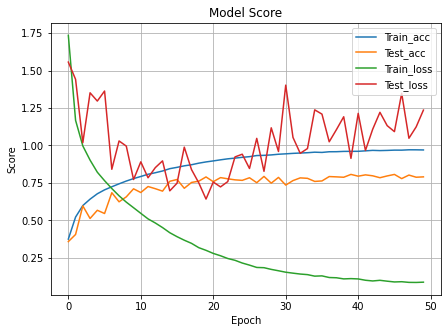

Epoch 1/50
782/782 [==============================] - 118s 147ms/step - loss: 1.6335 - accuracy: 0.3936 - val_loss: 2.2251 - val_accuracy: 0.3393
Epoch 2/50
782/782 [==============================] - 114s 146ms/step - loss: 1.1102 - accuracy: 0.5484 - val_loss: 1.4594 - val_accuracy: 0.4766
Epoch 3/50
782/782 [==============================] - 115s 146ms/step - loss: 0.9652 - accuracy: 0.6123 - val_loss: 1.2276 - val_accuracy: 0.5188
Epoch 4/50
782/782 [==============================] - 115s 147ms/step - loss: 0.8662 - accuracy: 0.6576 - val_loss: 1.3056 - val_accuracy: 0.5387
Epoch 5/50
782/782 [==============================] - 115s 147ms/step - loss: 0.7947 - accuracy: 0.6864 - val_loss: 1.5202 - val_accuracy: 0.5548
Epoch 6/50
782/782 [==============================] - 115s 147ms/step - loss: 0.7349 - accuracy: 0.7152 - val_loss: 1.2328 - val_accuracy: 0.5746
Epoch 7/50
782/782 [==============================] - 115s 147ms/step - loss: 0.6821 - accuracy: 0.7356 - val_loss: 1.0068 -

InternalError: Could not synchronize CUDA stream: CUDA_ERROR_MISALIGNED_ADDRESS: misaligned address

In [17]:
for i in  range(n_model):
    csv_logger = CSVLogger(path+'log/log'+str(i)+'.csv', append=True, separator=';')

    data[0]['train_x'+str(i)] = data[0].apply(lambda row: row['bs'+str(i*2)+'_x'] if row['y']<5 else row['bs'+str(i*2+1)+'_x'], axis=1)
    data[1]['test_x'+str(i)] = data[1].apply(lambda row: row['bs'+str(i*2)+'_x'] if row['y']<5 else row['bs'+str(i*2+1)+'_x'], axis=1) 
    train_x =np.array([[*a]for a in data[0]['train_x'+str(i)]])
    test_x =np.array([[*a]for a in data[1]['test_x'+str(i)]])

    his = model[i].fit(train_x, 
                train_y, 
                epochs=epochs, 
                batch_size=batch_size, 
                verbose=1,
                validation_data=(test_x, test_y),
                callbacks=[csv_logger]
                )
    
    model[i].save(path+'model/model'+str(i)+'.h5')
    with open(path+'his/his'+str(i)+'.pkl', 'wb') as fp:
        pickle.dump(his.history, fp)
    
    fig, ax = plt.subplots(figsize=(7, 5), sharex=True)
    plt.plot(his.history["accuracy"])
    plt.plot(his.history["val_accuracy"])
    plt.plot(his.history["loss"])
    plt.plot(his.history['val_loss'])
    plt.title("Model Score")
    plt.ylabel("Score")
    plt.xlabel("Epoch")
    # ax.xaxis.set_major_locator(plt.MaxNLocator(epochs))
    plt.legend(["Train_acc", "Test_acc","Train_loss", "Test_loss"], loc="upper right")
    plt.grid()
    plt.savefig(path+"loss/loss"+str(i)+".png",dpi=1000)
    plt.show()

In [ ]:
result = pd.DataFrame({"True_value":data[1]['y']})

In [ ]:
for i in range(n_model):
    test_x =np.array([[*a]for a in data[1]['test_x'+str(i)]])
    pred_y = model[i].predict( test_x )
    result['model'+str(i)] = [*pred_y]
    acc = categorical_accuracy( test_y, pred_y )
    np.mean(acc)

In [ ]:
result.to_pickle(path+'pre_test_result.pkl')

In [ ]:
result

In [ ]:
for i in range(n_model):
    result['model'+str(i)+'_pre_val'] = result['model'+str(i)].apply(lambda x : np.argmax(x))

In [ ]:
from scipy import stats
acc_m = tf.keras.metrics.Accuracy()

In [ ]:
n_vote = 20
vote_predict = result.apply(lambda row: stats.mode(row[n_model+1:n_model+1+n_vote])[0][0], axis=1)
acc_m.update_state([*result['True_value']], vote_predict)
print(acc_m.result().numpy())

In [ ]:
n_vote = 20
vote_predict = result.apply(lambda row: [sum(i) for i in zip(*row[1:1+n_vote])], axis=1)
acc = categorical_accuracy(test_y,vote_predict.tolist())
np.mean(acc)

In [ ]:
temp = []
for i in range(1,21):
    n_vote = i
    vote_predict = result.apply(lambda row: [sum(i) for i in zip(*row[1:1+n_vote])], axis=1)
    acc = categorical_accuracy(test_y,vote_predict.tolist())
    temp.append(np.mean(acc))
    print(np.mean(acc))